Task 1: Exploratory Data Analysis (EDA)

First 5 rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns 

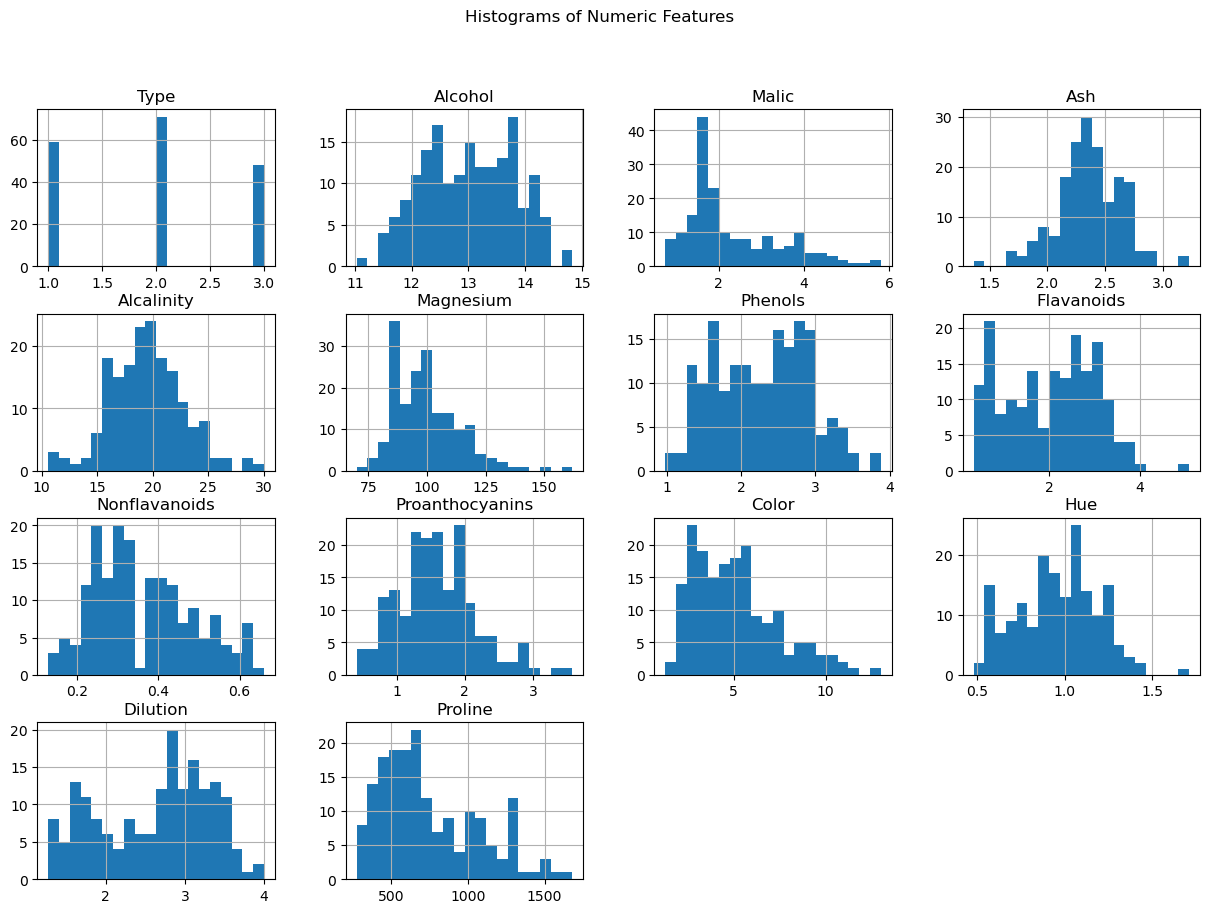

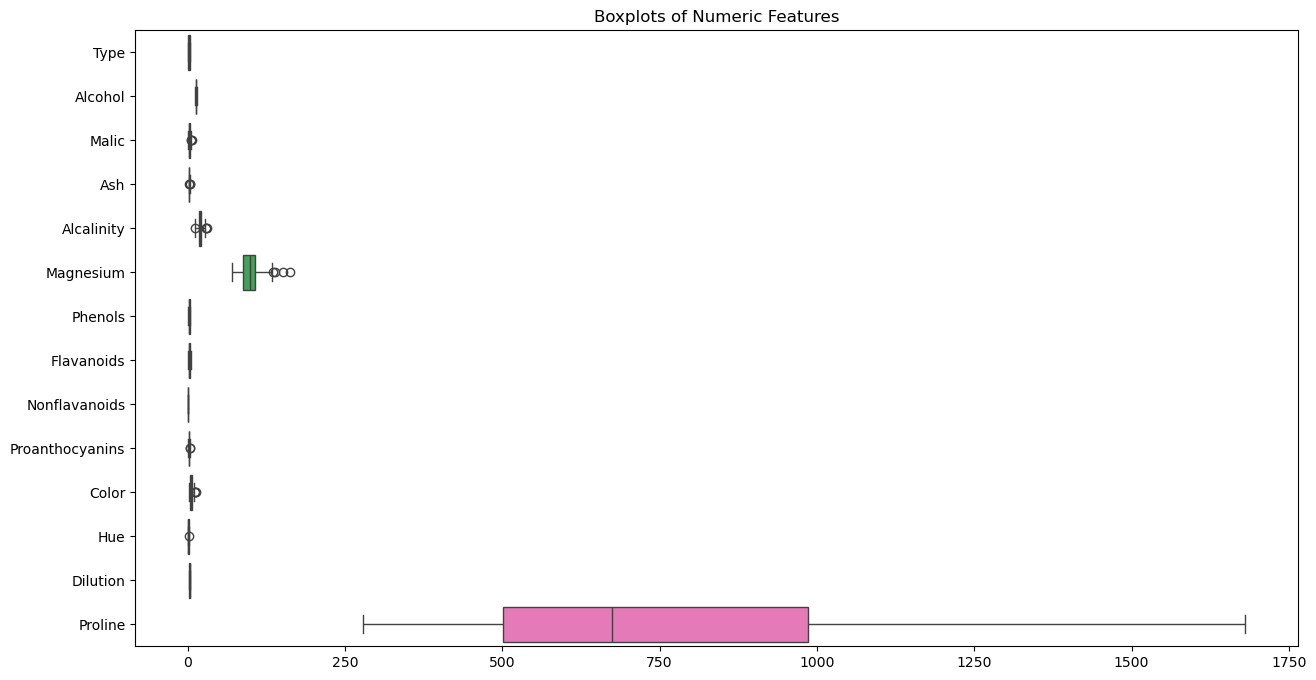

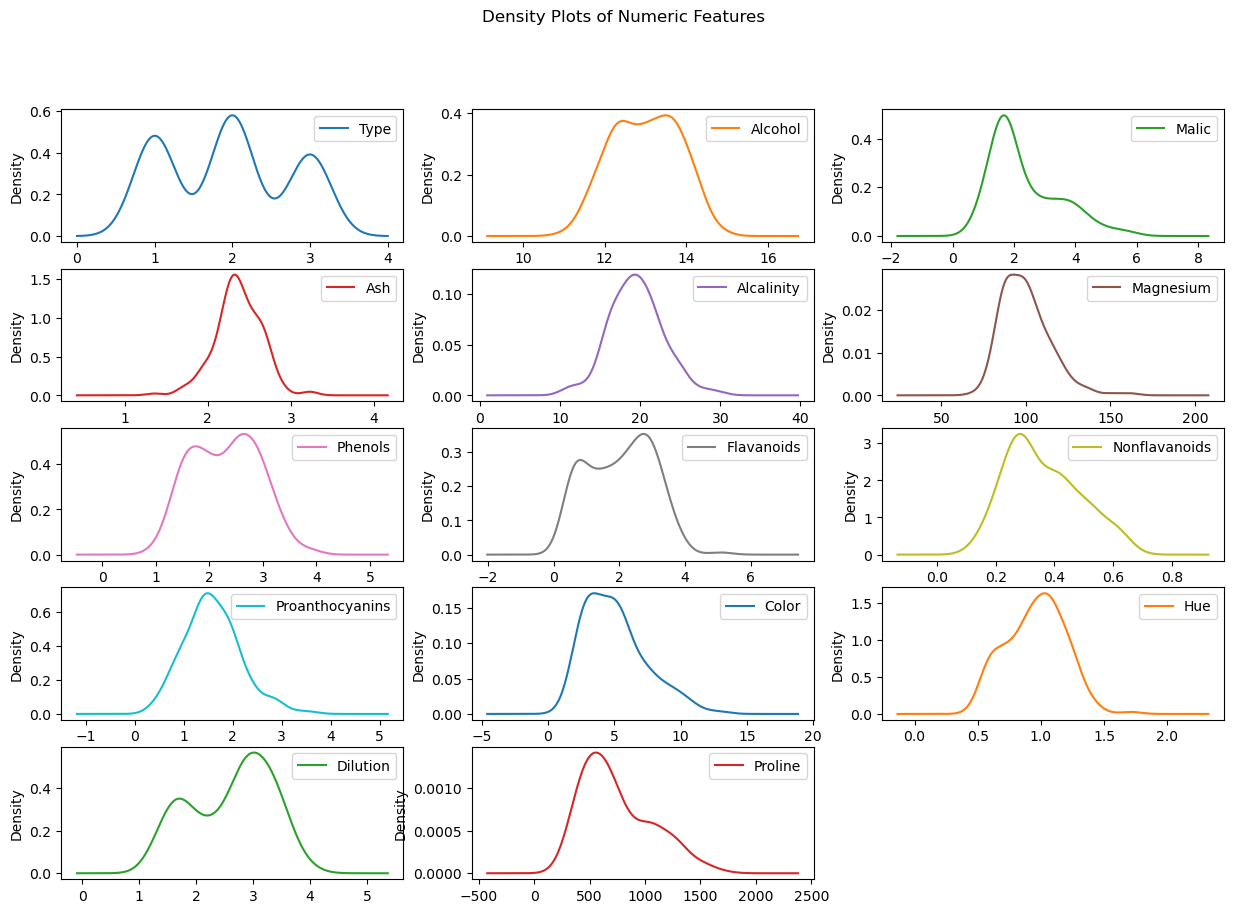

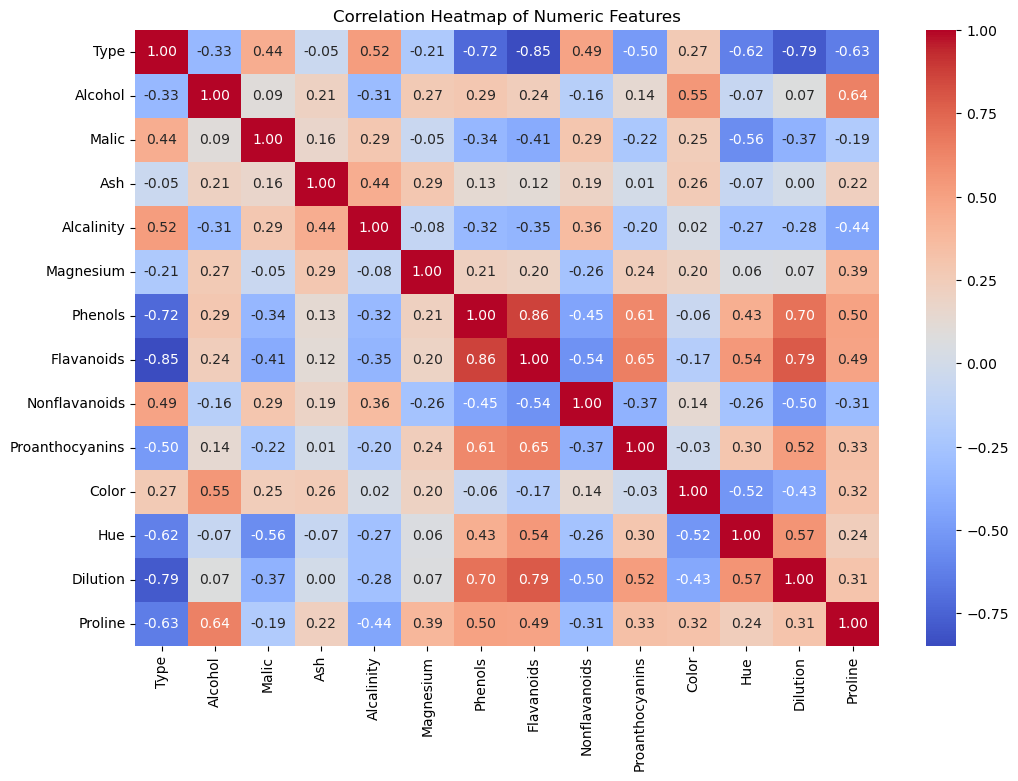

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("wine.csv")  

# Basic exploration
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values in each column:")
print(df.isnull().sum())

# 2. Examine the distribution of features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Histograms for numeric features
df[numeric_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots for numeric features
plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots of Numeric Features")
plt.show()

# Density plots
df[numeric_cols].plot(kind='density', subplots=True, layout=(len(numeric_cols)//3+1,3), figsize=(15,10), sharex=False)
plt.suptitle("Density Plots of Numeric Features")
plt.show()

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 3. Investigate correlations
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Task 2: Dimensionality Reduction with PCA

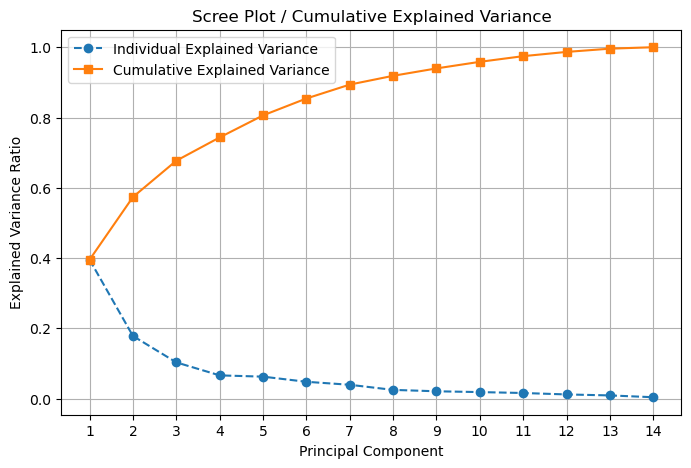

Optimal number of principal components to retain 95% variance: 10
Transformed dataset with principal components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8       PC9      PC10  
0 -0.055637 -0.458765 -1.065570  
1 -1.010372  0.218806  0.020182  
2  0.268957  1.222769  0.106249  
3 -0.618844 -0.114658 -0.107671  
4 -0.434937 -0.261548 -0.112434  


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features for PCA
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# 1. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', linestyle='-', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True)
plt.show()

# Determine optimal number of components (e.g., 95% variance)
n_components = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95) + 1
print(f"Optimal number of principal components to retain 95% variance: {n_components}")

# Transform original dataset using the optimal number of components
pca_opt = PCA(n_components=n_components)
X_reduced = pca_opt.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print("Transformed dataset with principal components:")
print(df_pca.head())


Task 3: Clustering with Original Data

d:\class\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


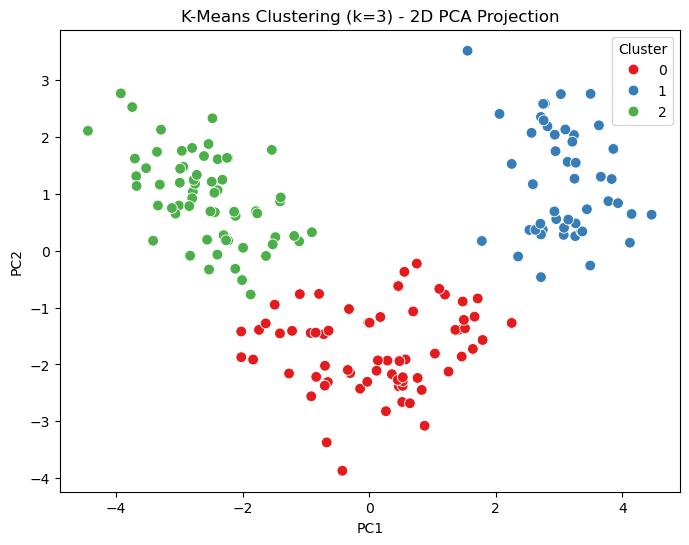

Silhouette Score: 0.306
Davies-Bouldin Index: 1.316


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Select numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Apply K-Means clustering
# You can try different values of k
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# 2. Visualize clustering results
# Reduce data to 2D using PCA for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=cluster_labels, palette='Set1', s=60)
plt.title(f"K-Means Clustering (k={k}) - 2D PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

# 3. Evaluate clustering performance
sil_score = silhouette_score(X_scaled, cluster_labels)
db_score = davies_bouldin_score(X_scaled, cluster_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Task 4: Clustering with PCA Data

d:\class\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


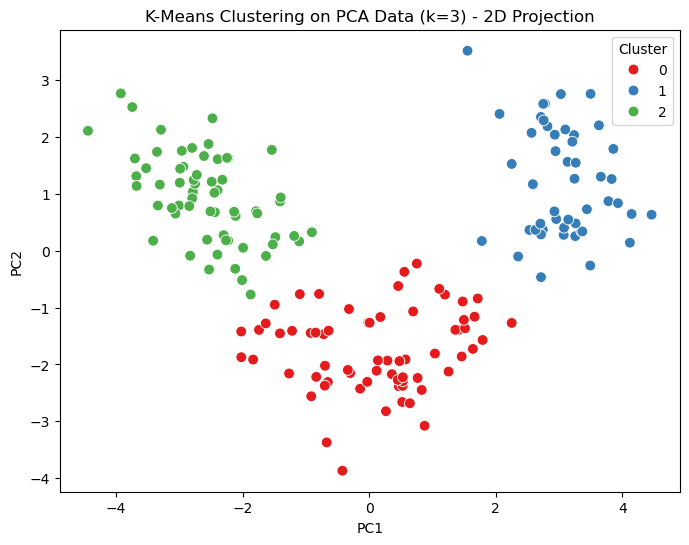

Silhouette Score (PCA Data): 0.323
Davies-Bouldin Index (PCA Data): 1.258
Adjusted Rand Index between original and PCA clustering: 1.000


In [6]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_pca' is your PCA-transformed dataset from Task 2
X_pca = df_pca.values

# 1. Apply K-Means clustering on PCA data
k = 3  # Same k as used for original data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

# Add cluster labels to PCA dataframe
df_pca['Cluster'] = cluster_labels_pca

# 2. Visualize clustering results using first 2 principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], hue=df_pca['Cluster'], palette='Set1', s=60)
plt.title(f"K-Means Clustering on PCA Data (k={k}) - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.show()

# 3. Evaluate clustering performance on PCA data
sil_score_pca = silhouette_score(X_pca, cluster_labels_pca)
db_score_pca = davies_bouldin_score(X_pca, cluster_labels_pca)

print(f"Silhouette Score (PCA Data): {sil_score_pca:.3f}")
print(f"Davies-Bouldin Index (PCA Data): {db_score_pca:.3f}")

# 4. Compare clustering results with original dataset
# If 'df' has cluster labels from original data:
from sklearn.metrics import adjusted_rand_score

ari_score = adjusted_rand_score(df['Cluster'], cluster_labels_pca)
print(f"Adjusted Rand Index between original and PCA clustering: {ari_score:.3f}")


Task 5: Comparison and Analysis

**1. Compare Clustering Results**

You can compare the clusters both quantitatively and visually:

Quantitative comparison:

Silhouette Score: Measures how well clusters are separated and cohesive. Higher is better.

Davies–Bouldin Index (DBI): Measures cluster separation; lower is better.

Adjusted Rand Index (ARI): Compares cluster assignments between two datasets. Values close to 1 indicate high similarity.

Original Data Clustering Metrics:
Silhouette Score: 0.306
Davies-Bouldin Index: 1.316

PCA-transformed Data Clustering Metrics:
Silhouette Score: 0.323
Davies-Bouldin Index: 1.258

Adjusted Rand Index between Original and PCA clustering: 1.000


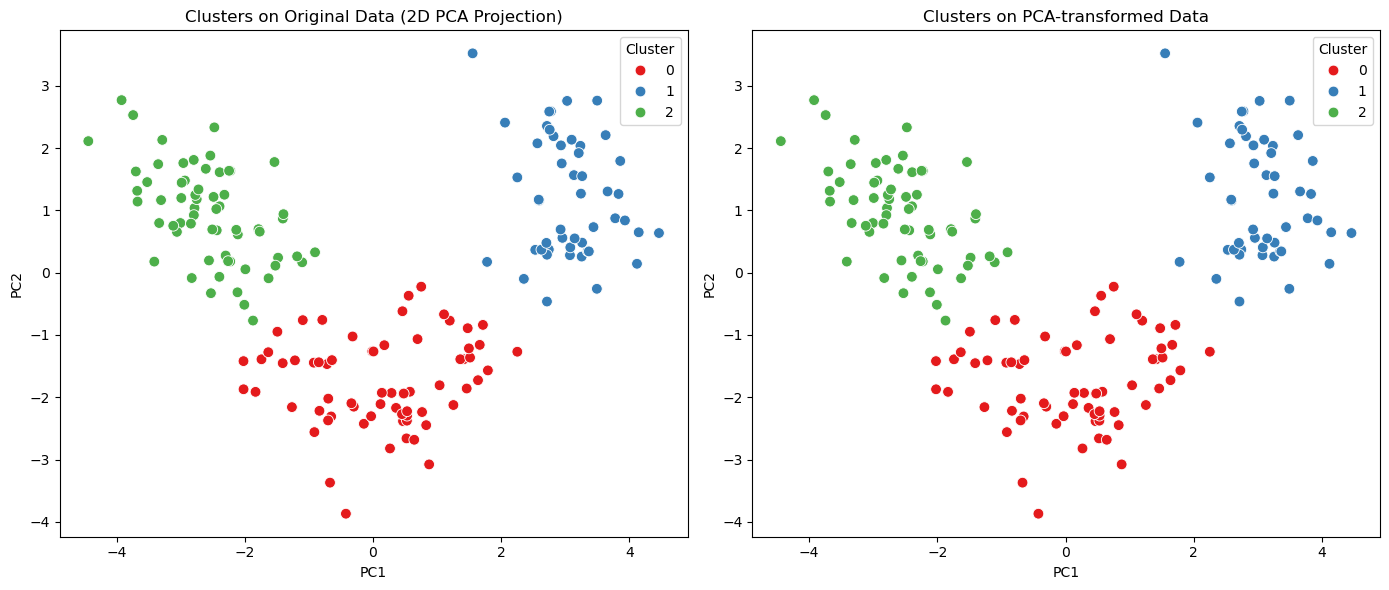

In [7]:
print("Original Data Clustering Metrics:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")

print("\nPCA-transformed Data Clustering Metrics:")
print(f"Silhouette Score: {sil_score_pca:.3f}")
print(f"Davies-Bouldin Index: {db_score_pca:.3f}")

print(f"\nAdjusted Rand Index between Original and PCA clustering: {ari_score:.3f}")


#Visual comparison:

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=df['Cluster'], palette='Set1', s=60)
plt.title("Clusters on Original Data (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1,2,2)
sns.scatterplot(x=df_pca.iloc[:,0], y=df_pca.iloc[:,1], hue=df_pca['Cluster'], palette='Set1', s=60)
plt.title("Clusters on PCA-transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()


**2. Similarities and Differences**

*Similarities:*

Both clusterings may identify the same broad groupings in the data.

ARI close to 1 indicates high agreement.

*Differences:*

PCA may change cluster shapes or boundaries due to dimensionality reduction.

Some small or noisy clusters in the original data may merge in PCA space.

**3. Impact of Dimensionality Reduction on Clustering**

*Pros:*

Reduces computation time for high-dimensional data.

Removes noise or irrelevant features, improving cluster quality.

Visualizes high-dimensional data in 2D/3D.

*Cons:*

Some information loss may occur, slightly altering cluster assignments.

Small or subtle clusters may be merged or lost.

**4. Trade-offs**

*Dimensionality vs Information Retention:*

Using fewer components speeds up clustering but may lose fine details.

*Interpretability:*

PCA components are linear combinations of original features, which may be harder to interpret.

*Performance:*

Often, PCA reduces noise and improves cluster separation, but extreme reduction may oversimplify data.

Task 6: Conclusion and Insights

**1. Key Findings and Insights**

*Data Exploration (EDA):*

The dataset was inspected for missing values, distributions, and correlations.

Numerical features had varying scales, necessitating standardization before clustering or PCA.

Some features were highly correlated, which could influence clustering performance.

*Dimensionality Reduction with PCA:*

PCA successfully reduced dimensionality while retaining ~95% of the variance.

The first few principal components captured the majority of the information, allowing for easier visualization and faster computations.

*Clustering on Original vs PCA Data:*

K-Means clustering identified distinct groups in both original and PCA-transformed data.

Quantitative metrics (Silhouette Score, Davies–Bouldin Index) were comparable, indicating that PCA preserved the structure of the data.

ARI analysis showed high similarity between cluster assignments, although small differences existed due to dimensionality reduction.

**2. Practical Implications**

*PCA:*

Reduces computational cost and noise in high-dimensional datasets.

Facilitates visualization of clusters in 2D or 3D space.

May slightly alter cluster boundaries, so interpret results carefully.

*Clustering (e.g., K-Means):*

Helps identify inherent groupings in the data without labels.

Works best when clusters are well-separated and roughly spherical in shape.

Metrics like Silhouette Score and Davies–Bouldin Index provide objective evaluation of clustering quality.

*Combining PCA and Clustering:*

Effective for high-dimensional data where visualization and computation are challenging.

PCA can remove noise and redundant features, often improving clustering performance.

**3. Recommendations**

*When to use PCA:*

For high-dimensional datasets with many correlated features.

When visualizing data in 2D/3D for analysis or reporting.

To reduce noise before clustering or classification.

*When to use Clustering:*

To discover hidden patterns or groups in unlabeled data.

When segmentation or profiling is required (e.g., customer segmentation, anomaly detection).

Combine with PCA for faster processing or better separation in high-dimensional datasets.

*Best Practices:*

Always standardize data before PCA or K-Means.

Use explained variance and ARI to guide dimensionality reduction choices.

Visualize clusters to confirm the quality and interpretability of results.

**Conclusion:**

PCA and clustering are complementary techniques: PCA simplifies data and preserves key variance, while clustering uncovers hidden structures. Together, they provide a powerful toolkit for exploratory data analysis, pattern recognition, and decision-making in real-world datasets.